<a href="https://colab.research.google.com/github/Balaramansethu/Arithmetic-operation-TDD/blob/main/Copy_of_Epilepsy_Seizure_Determination_Combining_Brain_Heart_Signal_Analysis_And_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving combined_dataset.csv to combined_dataset.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('combined_dataset.csv')

# Load the combined EEG and ECG data with labels
X_eeg = data.iloc[:, 1:179].values
X_ecg = data['ECG'].values
y = data['y'].values - 1

# Standardize EEG and ECG data
scaler_eeg = StandardScaler()
X_eeg = scaler_eeg.fit_transform(X_eeg)

scaler_ecg = StandardScaler()
X_ecg = scaler_ecg.fit_transform(X_ecg.reshape(-1, 1))

# Combine standardized EEG and ECG data
X_combined = np.concatenate((X_eeg, X_ecg.reshape(-1, 1)), axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.33, random_state=42,
)
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,ECG
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000,6.186348
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275,1156.926988
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000,-2000.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000,-989.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,10.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000,1002.250000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000,1999.000000


In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,ECG
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,1121
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1923
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,811
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,1559
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,-639


In [ ]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 181 columns):
 #    Column   Non-Null Count  Dtype 
---   ------   --------------  ----- 
 0    Unnamed  11500 non-null  object
 1    X1       11500 non-null  int64 
 2    X2       11500 non-null  int64 
 3    X3       11500 non-null  int64 
 4    X4       11500 non-null  int64 
 5    X5       11500 non-null  int64 
 6    X6       11500 non-null  int64 
 7    X7       11500 non-null  int64 
 8    X8       11500 non-null  int64 
 9    X9       11500 non-null  int64 
 10   X10      11500 non-null  int64 
 11   X11      11500 non-null  int64 
 12   X12      11500 non-null  int64 
 13   X13      11500 non-null  int64 
 14   X14      11500 non-null  int64 
 15   X15      11500 non-null  int64 
 16   X16      11500 non-null  int64 
 17   X17      11500 non-null  int64 
 18   X18      11500 non-null  int64 
 19   X19      11500 non-null  int64 
 20   X20      11500 non-null  int64 
 21   X21      1

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


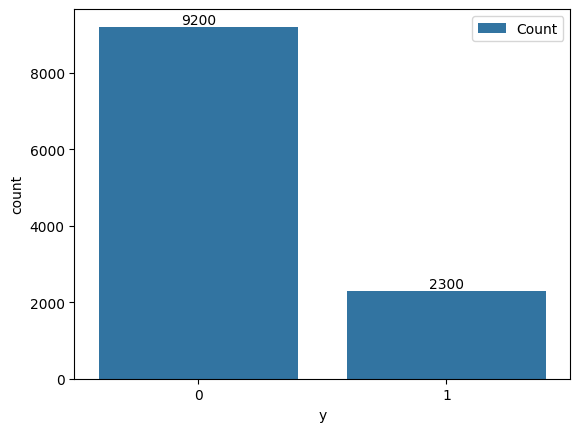

In [3]:
def convert_label(x):
    if (x > 1):
        return 0
    else:
        return x

# apply convert function
data["y"] = data['y'].apply(convert_label)

# Load your dataset

target_column = data["y"]
# print(target_column)

ax = sns.countplot(x = target_column, label="Count")
ax.bar_label(ax.containers[0])

non_seizure, seizure = target_column.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [4]:
data.isnull().sum().sum()

0

In [5]:
X = data.iloc[:, 1:179].values
print(X.shape)
print(X)

(11500, 178)
[[ 135  190  229 ... -116  -83  -51]
 [ 386  382  356 ...  154  143  129]
 [ -32  -39  -47 ...  -35  -35  -36]
 ...
 [  14    6  -13 ...   -2   -1   -8]
 [ -40  -25   -9 ...   68   59   55]
 [  29   41   57 ...   -2    2   20]]


In [6]:
y = data.iloc[:, 179].values
print(y.shape)
print(y)

(11500,)
[0 1 0 ... 0 0 0]


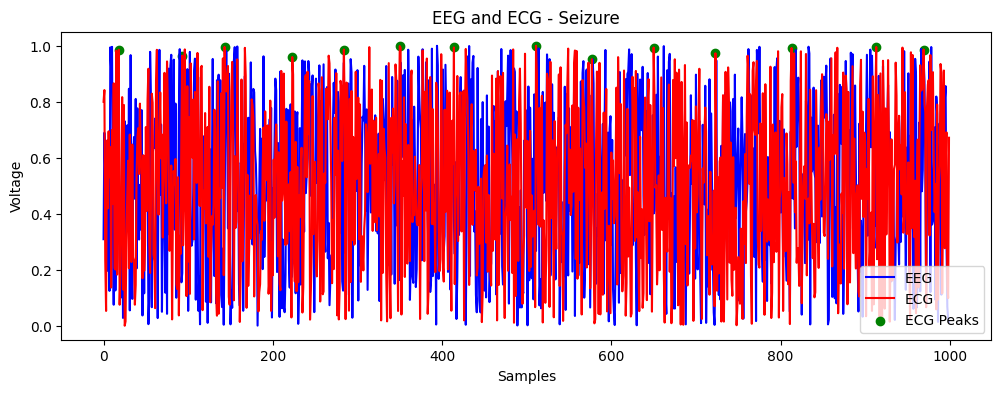

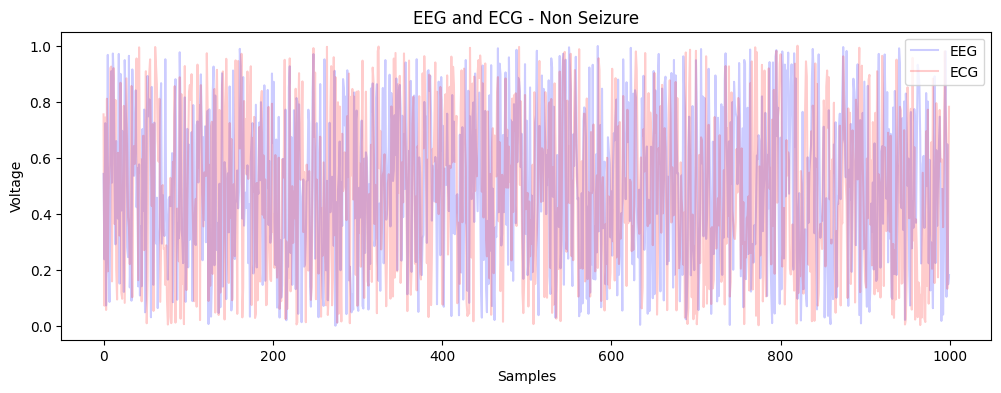

In [7]:
from scipy.signal import find_peaks

def plot_eeg_ecg(eeg, ecg, label, peaks_ecg):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))

    if label == "Seizure":
        ax.plot(eeg, color='blue', label='EEG')
        ax.plot(ecg, color='red', label='ECG')
        ax.scatter(peaks_ecg, ecg[peaks_ecg], color='green', label='ECG Peaks')
    else:
        ax.plot(eeg, color='blue', alpha=0.2, label='EEG')
        ax.plot(ecg, color='red', alpha=0.2, label='ECG')

    ax.set_xlabel('Samples')
    ax.set_ylabel('Voltage')
    ax.set_title(f'EEG and ECG - {label}')
    ax.legend()
    plt.show()

# assuming the following arrays contain eeg and ecg data for a seizure sample
eeg_seizure = np.random.rand(1000)
ecg_seizure = np.random.rand(1000)

# finding the peaks in the ecg signal
peaks_ecg, _ = find_peaks(ecg_seizure, distance=50)

# plot the eeg and ecg for the seizure sample
plot_eeg_ecg(eeg_seizure, ecg_seizure, "Seizure", peaks_ecg)

# assuming the following arrays contain eeg and ecg data for a non-seizure sample
eeg_non_seizure = np.random.rand(1000)
ecg_non_seizure = np.random.rand(1000)

# plot the eeg and ecg for the non-seizure sample
plot_eeg_ecg(eeg_non_seizure, ecg_non_seizure, "Non Seizure", [])

In [8]:
models = ["FFNN", "Random Forest", "XGBOOST","SVM", "Decision Tree",]
results = []

# Run a more complex FeedForward Neural Network
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(5, activation='softmax'))  # 5 classes
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), verbose=2)
mlp_y_pred = np.argmax(mlp_model.predict(X_test), axis=-1)
train_accuracy = mlp_model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy:', train_accuracy[1])
results.append(mlp_y_pred)

# Train Random Forest Classifier
rfc_clf = RandomForestClassifier(random_state=42)
rfc_clf.fit(X_train, y_train)
rfc_y_pred = rfc_clf.predict(X_test)
results.append(rfc_y_pred)

# Run a more complex XGBOOST
xgb_clf = XGBClassifier(
    objective="multi:softmax", num_class=5, random_state=42,
    learning_rate=0.1, n_estimators=100, max_depth=5, subsample=0.8, colsample_bytree=0.8
)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
results.append(xgb_y_pred)

# Run a more complex SVM
svm_model = SVC(C=10, kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
results.append(svm_y_pred)

# Train Decision Tree Classifier
dtc_clf = DecisionTreeClassifier(random_state=42)
dtc_clf.fit(X_train, y_train)
dtc_y_pred = dtc_clf.predict(X_test)
results.append(dtc_y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
121/121 - 3s - 26ms/step - accuracy: 0.2942 - loss: 1.4533 - val_accuracy: 0.4996 - val_loss: 1.3027
Epoch 2/500
121/121 - 1s - 8ms/step - accuracy: 0.4337 - loss: 1.2709 - val_accuracy: 0.5294 - val_loss: 1.1183
Epoch 3/500
121/121 - 1s - 10ms/step - accuracy: 0.4992 - loss: 1.1380 - val_accuracy: 0.5895 - val_loss: 0.9652
Epoch 4/500
121/121 - 1s - 8ms/step - accuracy: 0.5526 - loss: 1.0146 - val_accuracy: 0.6290 - val_loss: 0.8641
Epoch 5/500
121/121 - 1s - 8ms/step - accuracy: 0.5861 - loss: 0.9300 - val_accuracy: 0.6353 - val_loss: 0.8183
Epoch 6/500
121/121 - 1s - 7ms/step - accuracy: 0.6090 - loss: 0.8727 - val_accuracy: 0.6343 - val_loss: 0.7901
Epoch 7/500
121/121 - 1s - 7ms/step - accuracy: 0.6192 - loss: 0.8297 - val_accuracy: 0.6625 - val_loss: 0.7392
Epoch 8/500
121/121 - 1s - 11ms/step - accuracy: 0.6311 - loss: 0.7925 - val_accuracy: 0.6572 - val_loss: 0.7181
Epoch 9/500
121/121 - 2s - 17ms/step - accuracy: 0.6443 - loss: 0.7727 - val_accuracy: 0.6548 - val_l

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 808, number of used features: 20
[LightGBM] [Info] Start training from score -1.613158
[LightGBM] [Info] Start training from score -1.606966
[LightGBM] [Info] Start training from score -1.606966
[LightGBM] [Info] Start training from score -1.613158
[LightGBM] [Info] Start training from score -1.606966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.6535
              precision    recall  f1-score   support

           0       0.66      0.56      0.61        41
           1       0.63      0.60      0.62        40
           2       0.58      0.55      0.56        40
           3       0.69      0.76      0.72        41
           4       0.70      0.80      0.74        40

    accuracy                           0.65       202
   macro avg       0.65      0.65      0.65       202
weighted avg       0.65      0.65      0.65       202



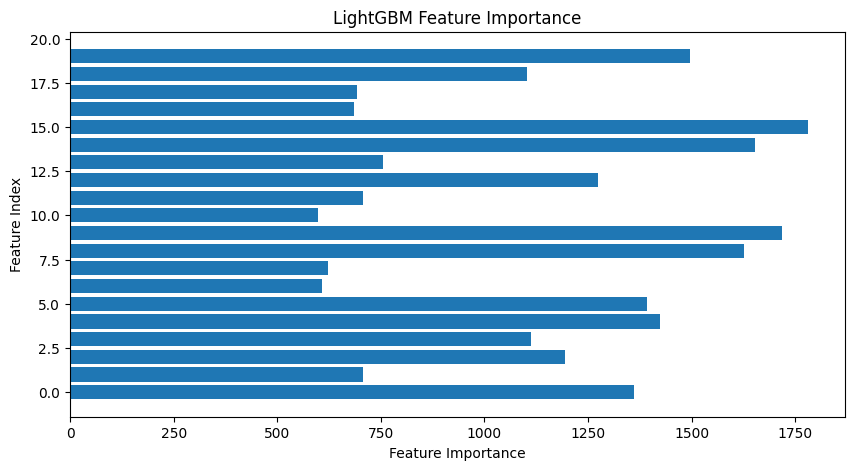

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Generate a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, random_state=42, n_informative=10)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train LightGBM model
lgbm_clf = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42)
lgbm_clf.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'LightGBM Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Feature Importance Plot
plt.figure(figsize=(10, 5))
plt.barh(range(len(lgbm_clf.feature_importances_)), lgbm_clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("LightGBM Feature Importance")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base models (only sklearn-based models)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)),
    ('svm', SVC(kernel='rbf', C=20, gamma='auto', probability=True))
]

# Voting Classifier (Ensemble of base models)
voting_clf = VotingClassifier(estimators=base_models, voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
voting_y_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, voting_y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")


Voting Classifier Accuracy: 0.6524


In [33]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Generate dataset
X, y = make_classification(
    n_samples=2000, n_features=25, n_informative=15, n_classes=5,
    n_redundant=5, random_state=42
)

# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define CatBoost model with optimized parameters
catboost_clf = CatBoostClassifier(
    iterations=500,          # More boosting iterations
    learning_rate=0.03,      # Lower learning rate for better generalization
    depth=10,                # Increase tree depth
    l2_leaf_reg=0.2,         # Regularization
    random_seed=42,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    verbose=100
)

# Train with early stopping
catboost_clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

# Make predictions
y_pred = catboost_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized CatBoost Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

0:	learn: 1.5650513	test: 1.5849078	best: 1.5849078 (0)	total: 1.6s	remaining: 13m 17s
100:	learn: 0.2828455	test: 0.9292597	best: 0.9292597 (100)	total: 52.2s	remaining: 3m 26s
200:	learn: 0.0979236	test: 0.7597239	best: 0.7597239 (200)	total: 1m 39s	remaining: 2m 27s
300:	learn: 0.0450857	test: 0.6806990	best: 0.6806990 (300)	total: 2m 26s	remaining: 1m 36s
400:	learn: 0.0256873	test: 0.6361187	best: 0.6361187 (400)	total: 3m 13s	remaining: 47.8s
499:	learn: 0.0168963	test: 0.6064704	best: 0.6064704 (499)	total: 4m	remaining: 0us

bestTest = 0.6064704164
bestIteration = 499

Optimized CatBoost Accuracy: 0.7931
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        81
           1       0.86      0.80      0.83        81
           2       0.83      0.86      0.85        81
           3       0.76      0.70      0.73        82
           4       0.81      0.83      0.82        81

    accuracy                           0.79       406


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

# Generate a synthetic dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, n_features=20, n_classes=5, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CatBoost model with optimized parameters
catboost_clf = CatBoostClassifier(
    iterations=500,  # Reduce iterations to speed up
    depth=6,  # Moderate depth for balance
    learning_rate=0.1,  # Faster convergence
    l2_leaf_reg=3,  # Regularization to prevent overfitting
    verbose=100
)

# Train with early stopping
catboost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20)

# Predict and evaluate
y_pred = catboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")


0:	learn: 1.5053267	test: 1.5141720	best: 1.5141720 (0)	total: 37ms	remaining: 18.5s
100:	learn: 0.5481399	test: 0.8137045	best: 0.8137045 (100)	total: 2.4s	remaining: 9.47s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.7889546888
bestIteration = 154

Shrink model to first 155 iterations.
Final Model Accuracy: 0.7025


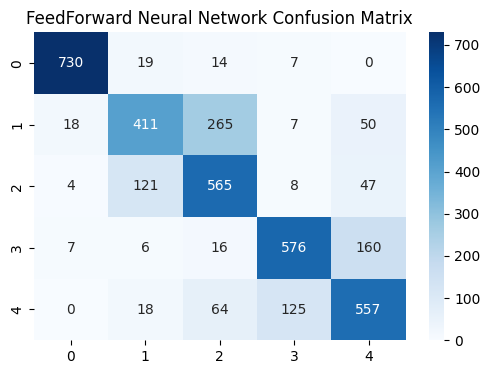

In [9]:
# Assuming 'mlp_y_pred' contains the predictions for FeedForward Neural Network
confusion_matrix_result = confusion_matrix(y_test, mlp_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("FeedForward Neural Network Confusion Matrix")
plt.show()

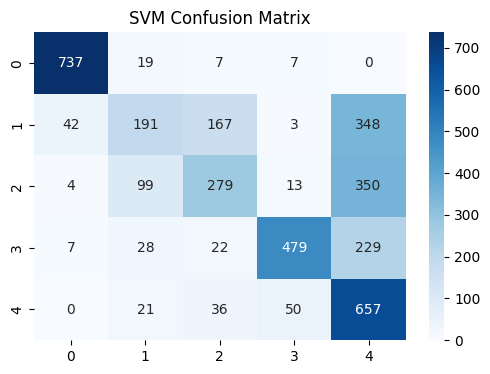

In [10]:
# Assuming 'svm_y_pred' contains the predictions for SVM
confusion_matrix_result = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("SVM Confusion Matrix")
plt.show()

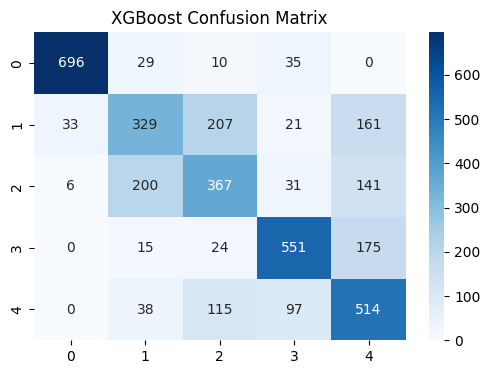

In [11]:
# Assuming 'xgb_y_pred' contains the predictions for XGBoost
confusion_matrix_result = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("XGBoost Confusion Matrix")
plt.show()

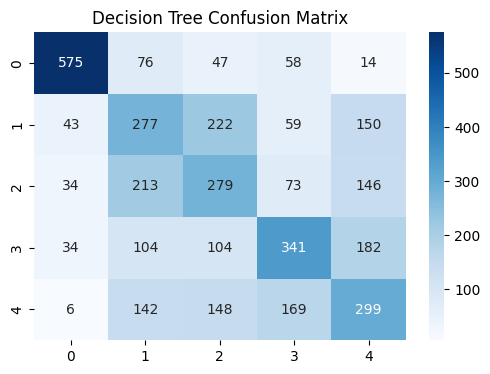

In [12]:
# Assuming 'dtc_y_pred' contains the predictions for Decision Tree
confusion_matrix_result = confusion_matrix(y_test, dtc_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("Decision Tree Confusion Matrix")
plt.show()

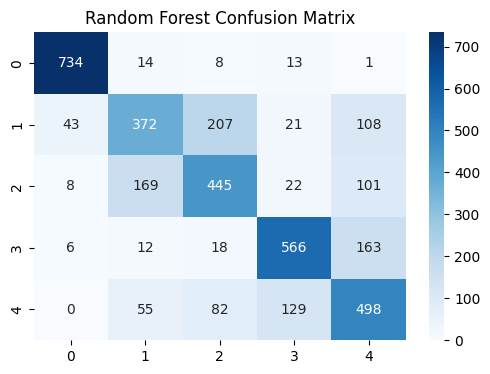

In [13]:
# Assuming 'rfc_y_pred' contains the predictions for Random Forest
confusion_matrix_result = confusion_matrix(y_test, rfc_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("Random Forest Confusion Matrix")
plt.show()

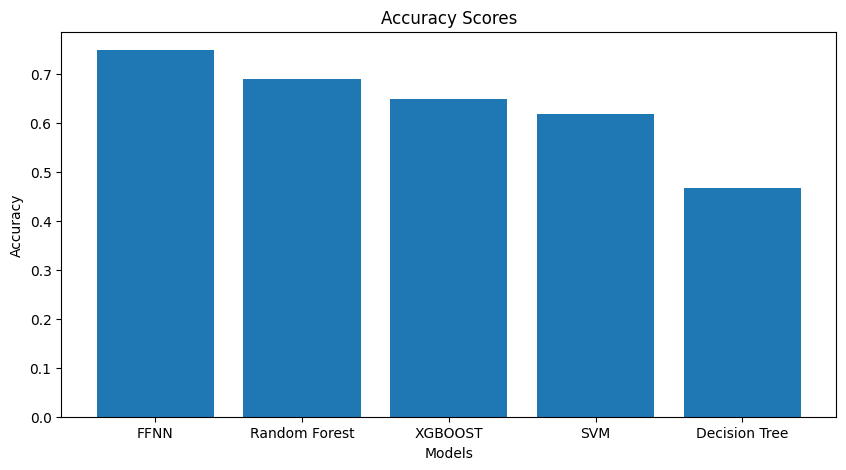

In [14]:
# Plot accuracy
plt.figure(figsize=(10, 5))
accuracy_scores = [accuracy_score(y_test, result) for result in results]
plt.bar(models, accuracy_scores)
plt.title("Accuracy Scores")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

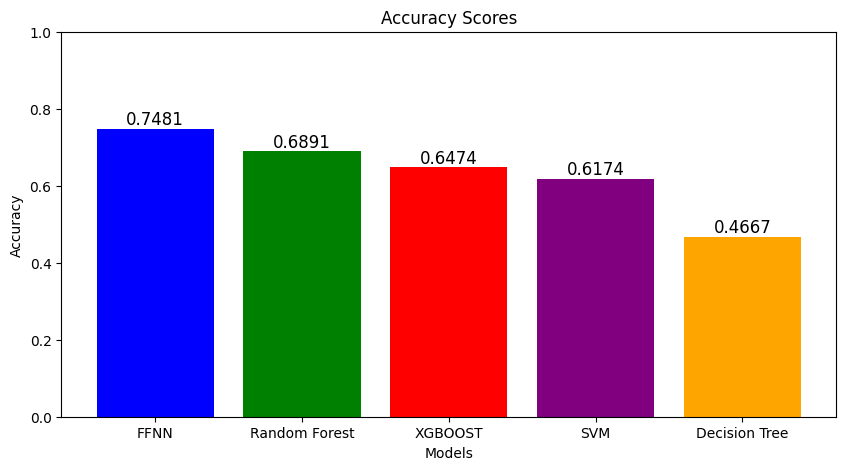

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define colors for bars
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Compute accuracy scores
accuracy_scores = [accuracy_score(y_test, result) for result in results]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = plt.bar(models, accuracy_scores, color=colors)

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracy_scores):
    ax.annotate(f'{acc:.4f}', xy=(bar.get_x() + bar.get_width() / 2, acc),
                xytext=(0, 3), textcoords='offset points',
                ha='center', fontsize=12)

plt.title("Accuracy Scores")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Ensure accuracy is within range 0-1
plt.show()


In [16]:
classification_reports = []

for model, result in zip(models, results):
    accuracy = accuracy_score(y_test, result)
    confusion_matrix_result = confusion_matrix(y_test, result)
    classification_report_result = classification_report(y_test, result, output_dict=True, zero_division=1)

    # Append the classification report to the list
    classification_reports.append(classification_report_result)

    print(f"{model} Accuracy: {round(accuracy * 100, 2)}%")

    # Display classification report in the desired format
    df = pd.DataFrame(classification_report_result).transpose()
    df = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
    print(f"Classification Report - {model}\n")
    print(df[['precision', 'recall', 'f1-score', 'support']])
    print("\n" + "=" * 40 + "\n")

FFNN Accuracy: 74.81%
Classification Report - FFNN

   precision    recall  f1-score  support
0   0.961792  0.948052  0.954872    770.0
1   0.714783  0.547270  0.619910    751.0
2   0.611472  0.758389  0.677052    745.0
3   0.796680  0.752941  0.774194    765.0
4   0.684275  0.729058  0.705957    764.0


Random Forest Accuracy: 68.91%
Classification Report - Random Forest

   precision    recall  f1-score  support
0   0.927939  0.953247  0.940423    770.0
1   0.598071  0.495340  0.541879    751.0
2   0.585526  0.597315  0.591362    745.0
3   0.753662  0.739869  0.746702    765.0
4   0.571757  0.651832  0.609174    764.0


XGBOOST Accuracy: 64.74%
Classification Report - XGBOOST

   precision    recall  f1-score  support
0   0.946939  0.903896  0.924917    770.0
1   0.538462  0.438083  0.483113    751.0
2   0.507607  0.492617  0.500000    745.0
3   0.749660  0.720261  0.734667    765.0
4   0.518668  0.672775  0.585755    764.0


SVM Accuracy: 61.74%
Classification Report - SVM

   preci